# **Question 1**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#Installing necessary libraries
import os
import glob
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
import re
import string
import json
import pandas as pd
import numpy as np
import math
from textblob import TextBlob, Word
import joblib
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from pandas.core.dtypes.cast import dict_compat

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lema = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Jaccard Coefficient**

In [2]:
#Load the dataset
path = "data"
#os.chdir("..")
os.chdir(path)

# **1 (1)**

In [3]:
ln = len(string.punctuation)
#Cleaning the data
def pre_process(content):
  #Convert the text to lower case
  content = content.lower()
  #Remove punctuation marks from tokens
  content = content.translate(str.maketrans(string.punctuation, " "*ln,''))
  #Perform word tokenization
  ctokens = word_tokenize(content)
  #Remove stopwords from tokens and do lemmatization
  #Checking length, if length = 1
  ctokens = [lema.lemmatize(s) for s in ctokens if s not in stopwords.words('english') and s.isalpha and len(s)>1]
  return ctokens

In [5]:
dc = {}
document = {}
#Iterate over the dataset for preprocessing and reading the files
c = 0
for file in glob.glob("*"):
  c = c+1
  print(file)
  document[c] = file
  #Reading the file
  with open(file,'r',encoding = 'utf8', errors = 'ignore') as f:
    rfile = f.read()
    tl = pre_process(rfile)
    dc[c] = tl

1st_aid.txt
a-team
abbott.txt
aboutada.txt
acetab1.txt
aclamt.txt
acne1.txt
acronym.lis
acronym.txt
acronyms.txt
adameve.hum
adcopy.hum
addrmeri.txt
admin.txt
adrian_e.faq
ads.txt
adt_miam.txt
advrtize.txt
aeonint.txt
age.txt
aggie.txt
aids.txt
airlines
alabama.txt
alcatax.txt
alcohol.hum
alflog.txt
allfam.epi
allusion
all_grai
amazing.epi
ambrose.bie
amchap2.txt
analogy.hum
aniherb.txt
anime.cli
anime.lif
anim_lif.txt
annoy.fascist
anorexia.txt
answers
anthropo.stu
antibiot.txt
antimead.bev
aphrodis.txt
appbred.brd
appetiz.rcp
applepie.des
apsaucke.des
apsnet.txt
arab.dic
arcadian.txt
argotdic.txt
arnold.txt
art-fart.hum
arthriti.txt
ateam.epi
atherosc.txt
atombomb.hum
att.txt
aussie.lng
avengers.lis
awespinh.sal
ayurved.txt
a_fish_c.apo
a_tv_t-p.com
b-2.jok
b12.txt
back1.txt
bad
bad-d
bad.jok
badday.hum
bagelope.txt
bakebred.txt
baklava.des
banana01.brd
banana02.brd
banana03.brd
banana04.brd
banana05.brd
bank.rob
barney.cn1
barney.txt
basehead.txt
batrbred.txt
bb
bbc_vide.cat
bbh_int

nigel.7
nigel10.txt
nihgel_8.9
nintendo.jok
normal.boy
normalboy.txt
normquot.txt
nosuch_nasfic
novel.hum
nuke.hum
nukeplay.hum
nukewar.jok
nukewar.txt
nukwaste
number
number.killer
number_k.ill
nurds.hum
nysucks.hum
nzdrinks.txt
o-ttalk.hum
oakwood.txt
oam-001.txt
oam.nfo
oasis
oatbran.rec
oculis.rcp
odd_to.obs
odearakk.hum
office.txt
ohandre.hum
oilgluts.hum
old.txt
oldeng.hum
oldtime.sng
oldtime.txt
oliver.txt
oliver02.txt
onan.txt
one.par
onetoone.hum
onetotwo.hum
ookpik.hum
opinion.hum
oracle.jok
oranchic.pol
orgfrost.bev
ourfathr.txt
outawork.erl
outlimit.txt
oxymoron.jok
oxymoron.txt
ozarks.hum
p-law.hum
packard.txt
paddingurpapers.txt
parabl.hum
parades.hum
parsnip.txt
passage.hum
passenge.sim
pasta001.sal
pat.txt
pbcookie.des
peanuts.txt
peatchp.hum
pecker.txt
penisprt.txt
penndtch
pepper.txt
pepsideg.txt
petshop
phony.hum
phorse.hum
phunatdi.ana
phxbbs-m.txt
pickup.lin
pickup.txt
pipespec.txt
pizzawho.hum
planeget.hum
planetzero.txt
poets.hum
pol-corr.txt
polemom.txt
poli.tic

# **1 (2)**

In [7]:
#function to make set of the document token and query token and perform intersection and union between the query and each document
def jaccard_coeff(tdoc,tquery):
    set1 = set(tdoc)
    set2 = set(tquery)
    un = set1.union(set2)
    it = set1.intersection(set2)
    #Jaccard Coefficient = Intersection of (doc,query) / Union of (doc,query)
    jc = len(it)/len(un)
    return jc

In [8]:
#Function to Report the top 5 relevant documents based on the value of the Jaccard coefficient
def top_doc(pquery):
    js = []
    for i in dc:
        js.append([jaccard_coeff(dc[i],pquery),i])
     #Sorting based on the coefficient value   
    js.sort(key=lambda x:x[0])
    return js

# **1 (3)**

In [9]:
#Take input query from user
print("Enter Query:")
query = input()
#Pre process the input query
pquery = pre_process(query)
print(pquery)
js = top_doc(pquery)
#reporting top 5
for i in range(5):
    print(document[js[i][1]])

Enter Query:
100 west by 50 north
['100', 'west', '50', 'north']
1st_aid.txt
abbott.txt
acetab1.txt
aclamt.txt
acronym.lis


# **TF-IDF Matrix**

In [10]:
unq = []
#finding unique words present
for lt in dc:
    list1 = list(set(dc[lt]))
    unq.extend(list1)
    unq = list(set(unq))
print(len(unq))

64206


In [11]:
#Computing the document frequency
def doc_freq():
    doc_f = {}
    for i in dc:
        tl = list(set(dc[i]))
        for t in tl:
            if t in doc_f:
                doc_f[t] = doc_f[t] + 1
            else:
                doc_f[t] = 1
    return doc_f

In [12]:
doc_f = doc_freq()
print(len(doc_f))

64206


In [13]:
#Function to compute inverse document frequency
def inverse_df():
    idf = {}
    total_doc = len(dc)
    for t in doc_f:
        idf[t] = math.log(total_doc/doc_f[t]+1)
    return idf

In [18]:
idf = inverse_df()
print(len(idf))

64206


In [29]:
from pandas.core.dtypes.cast import dict_compat
#Finding frequency
def freq():
    f = {}
    for i in dc:
        f[i] = {}
        for t in dc[i]:
            if t in f[i]:
                f[i][t] += 1
            else:
                f[i][t] = 1
    return f

In [30]:
f = freq()
print(len(f))

1133


In [32]:
#Function to compute Binary weighting scheme
def binary_tf():
    btf = {}
    for di in f:
        btf[di]={}
        for w in f[di]:
            btf[di][w] = 1
    return btf

In [33]:
btf = binary_tf()
print(btf[1])

{'herbalherb1st': 1, 'aidcalendulacomfreyremediessickmedicine': 1, 'herbal': 1, 'first': 1, 'aid': 1, 'kit': 1, 'calendula': 1, 'ointment': 1, 'use': 1, 'minor': 1, 'cut': 1, 'graz': 1, 'red': 1, 'rash': 1, 'skin': 1, 'comfrey': 1, 'suitable': 1, 'bruise': 1, 'damage': 1, 'external': 1, 'blood': 1, 'vessel': 1, 'vein': 1, 'st': 1, 'johnswort': 1, 'oil': 1, 'beneficial': 1, 'itchy': 1, 'irritable': 1, 'psoriasis': 1, 'also': 1, 'good': 1, 'sunburn': 1, 'applied': 1, 'night': 1, 'liver': 1, 'mixture': 1, 'mild': 1, 'laxative': 1, 'property': 1, 'help': 1, 'digestion': 1, 'rich': 1, 'food': 1, 'take': 1, 'one': 1, 'teaspoon': 1, '30': 1, 'minute': 1, 'main': 1, 'meal': 1, 'parasite': 1, 'effective': 1, 'common': 1, 'internal': 1, 'infestation': 1, 'suspected': 1, 'abstain': 1, '24': 1, 'hour': 1, 'tablespoon': 1, 'little': 1, 'water': 1, 'repeat': 1, 'dose': 1, 'four': 1, 'another': 1, 'died': 1, 'able': 1, 'recommence': 1, 'eating': 1, 'last': 1, 'gasp': 1, 'may': 1, 'used': 1, 'wash': 1

In [34]:
#Function to compute Raw count weighting scheme
def rawcount_tf():
    rctf = {}
    for di in f:
        rctf[di]={}
        for w in f[di]:
            rctf[di][w]=f[di][w]
    return rctf

In [35]:
rctf = rawcount_tf()
print(len(rctf[1]))

148


In [36]:
#Function to compute term frequency weighting scheme
def term_freq():
    tf = {}
    for di in f:
        tf[di]={}
        s=sum(f[di].values())
        for w in f[di]:
            tf[di][w] = f[di][w]/s
    return tf

In [37]:
tf = term_freq()
print(len(tf[1]))

148


In [38]:
#Function to compute Log normalization weighting scheme
def log_tf():
    ltf={}
    for di in f:
        ltf[di]={}
        for w in f[di]:
            ltf[di][w]=math.log(1+f[di][w])
    return ltf

In [39]:
ltf = log_tf()
print(len(ltf[1]))

148


In [40]:
#Function to compute Double normalization weighting scheme
def double_tf():
    dntf = {}
    for di in f:
        dntf[di] = {}
        m=max(f[di].values())
        for w in f[di]:
            dntf[di][w] = 0.5+0.5*(f[di][w]/m)
    return dntf

In [41]:
dntf = double_tf()
print(len(dntf[1]))

148


In [42]:
dl = len(dc)
vl = len(unq)

In [43]:
#Function to compute Binary weighting scheme
def tf_idf(tf):
    tfidf={}
    for di in f:
        tfidf[di]={}
        for w in unq:
            if w in tf[di]:
                tf1=tf[di][w]
            else:
                tf1=0
            idf1=idf[w]
            tfidf[di][w]=tf1*idf1
    return tfidf

In [44]:
btfidf = tf_idf(btf)
print(len(btfidf))
print(len(btfidf[1]))

1133
64206


In [45]:
rctfidf = tf_idf(rctf)
print(len(rctfidf[1]))

64206


In [46]:
tfidf = tf_idf(tf)
print(len(tfidf[1]))

64206


In [47]:
ltfidf = tf_idf(ltf)
print(len(ltfidf[1]))

64206


In [48]:
def tf_idf1(tf):
    tfidf={}
    for di in f:
        tfidf[di]={}
        for w in unq:
            if w in tf[di]:
                tf1=tf[di][w]
            else:
                tf1 = 0.5
            idf1 = idf[w]
            tfidf[di][w] = tf1*idf1
    return tfidf

In [49]:
dntfidf = tf_idf1(dntf)
print(len(dntfidf))
print(len(dntfidf[1]))

1133
64206


In [57]:
#
def iquery(qt,tfidf):
    score = {}
    for d1 in dc:
        score[d1] = 0
        for t in qt:
            score[d1]+= tfidf[d1][t]
    dl = []
    dl1 = sorted(range(1,len(score)+1), key=lambda i: score[i], reverse=True)[:6]
    for i in dl1:
        dl.append(document[i])
    return dl

In [58]:
print("Enter Input Query:")
query = input()
pquery = pre_process(query)
print(pquery)

#binary weighting scheme
print("\nbinary ")
bd = iquery(pquery,btfidf)
print(*bd)

#raw count weighting scheme
print("\nraw count ")
rcd = iquery(pquery,rctfidf)
print(*rcd)

#term frequency weighting scheme
print("\nterm frequency ")
tfd = iquery(pquery,tfidf)
print(*tfd)

#log normalization weighting scheme
print("\nlog norm ")
ld = iquery(pquery,ltfidf)
print(*ld)

#double normalization weighting scheme
print("\ndouble norm ")
dnd = iquery(pquery,dntfidf)
print(*dnd)

Enter Input Query:
once upon a time.
['upon', 'time']

binary 
adt_miam.txt allusion all_grai amazing.epi ambrose.bie ayurved.txt

raw count 
mlverb.hum practica.txt barney.txt humor9.txt manners.txt xibovac.txt

term frequency 
timetr.hum ookpik.hum sysman.txt corporat.txt trukdeth.txt yuppies.hum

log norm 
barney.txt mindvox practica.txt quack26.txt humor9.txt jokes1.txt

double norm 
ookpik.hum jokes1.txt trukdeth.txt ambrose.bie mindvox flux_fix.txt


# **Question 2**
# **Ranked-Information Retrieval and Evaluation**

In [45]:
#Load the dataset
path = "data_new"
os.chdir("..")
os.chdir(path)

In [46]:
#Loading the dataset
df = pd.read_csv("IR-assignment-2-data.txt", sep=' ', header=None)
#Convert given text file to csv
df.to_csv('final_data.csv', index = None)

# **2 (1)**

In [47]:
#Select rows with qid:4 
fdata = df[df[1] == 'qid:4']

total_files = 1
temp = []
r = fdata[0].unique()
for i in r:
    temp.append(len(fdata[fdata[0] == i]))
    total_files = total_files * math.factorial(len(fdata[fdata[0] == i]))

#Sort the data on the basis of relevance judgement label
final_data = fdata.sort_values(by = 0, ascending = False )
final_data = final_data.reset_index(drop=True)

In [53]:
#Select rows with qid:4 
fdata = df[df[1] == 'qid:4']

total_files = 1
temp = []
r = fdata[0].unique()
for i in r:
    temp.append(len(fdata[fdata[0] == i]))
    total_files = total_files * math.factorial(len(fdata[fdata[0] == i]))

#Sort the data on the basis of relevance judgement label
final_data = fdata.sort_values(by = 0, ascending = False )
final_data = final_data.reset_index(drop=True)

# **2 (2)**

In [48]:
#File rearranging the query-url pairs in order of max DCG.
final_data.to_csv('query-url-pairs.csv')

#Computing total number of such files
print(f"Total number of files: {total_files}")

Total number of files: 19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


# **2 (3.a)**

In [62]:
#Sorting data in ascending order
d1 = fdata.sort_values(by=0, ascending=False)

In [67]:
#Function to compute DCG
def DCG_Calculation(datadup,n):
    datadup = np.asfarray(datadup)[:n]
    dcg_val = datadup[0] + np.sum(datadup[1:] / np.log2(np.arange(2, datadup.size + 1)))
    return dcg_val

In [65]:
dcgvalue=DCG_Calculation(fdata[0], 50)
print("The value of DCG at n is 50 " , dcgvalue)

The value of DCG at n is 50  7.39058096925802


In [68]:
#Computing maximum DCG
for j in range(1,104):
    l = []
    l.append(DCG_Calculation(d1[0],i))
print("The Maximium DCG is : ",max(l))

The Maximium DCG is :  20.989750804831452


In [69]:
#computing nDCG 
def NDCG_Calculation(r, k):
    denominator = DCG_Calculation(d1[0], k)
    numerator = DCG_Calculation(r, k)
    value = numerator/denominator
    return  value

In [70]:
#nDCG value at 50
nDCG_value_50 = NDCG_Calculation(fdata[0],50)
print("The value of nDCG at 50 is : ",nDCG_value_50 )

The value of nDCG at 50 is :  0.35210427403248856


In [71]:
#nDCG value for complete dataset
nDCG_value = NDCG_Calculation(fdata[0],len(fdata))
print("The value of nDCG for all is : ",nDCG_value )

The value of nDCG for all is :  0.5979226516897828


In [73]:
#To store the values obtained from TF-IDF into a list 
p=0
value1 = fdata[76]
value2 = fdata[0]
value1l = value1.tolist()
value2l = value2.tolist()
for dup_list in value1l:
    if dup_list[0] == "7" and dup_list[1] == "5" and dup_list[2] == ":":
        i1 = dup_list[3:]
        value1l[p] = i1
    p = p+1
value1lf = [float(i) for i in value1l]

In [80]:
#Declaring the required variables and the precision and recall lists
total=0
relevant_present=0
relevant_doc=0
list_prevision=[]
list_recall=[]

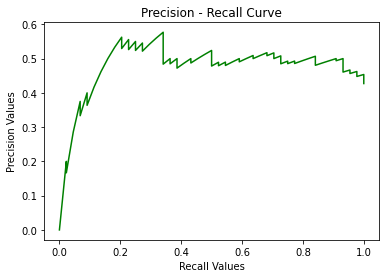

In [79]:
#Calculation of precision and recall values
sorted_rel = [m for n,m in sorted(zip(xmlf,xol),reverse=True)]
sorted_rel2 = [(n,m) for n,m in sorted(zip(xmlf,xol),reverse=True)]

for m in sorted_rel:
    if m == 0:
        relevant_doc = relevant_doc
    else:
        relevant_doc = relevant_doc + 1


for m in sorted_rel:
    total= total + 1
    if m == 0:
        relevant_present = relevant_present
    else:
        relevant_present = relevant_present + 1
    list_prevision.append(relevant_present/total)
    list_recall.append(relevant_present/relevant_doc)

#Plotting Precision - Recall Graph    
plt.title("Precision - Recall Curve")
plt.plot(list_recall,list_prevision,color="green")
plt.xlabel("Recall Values")
plt.ylabel("Precision Values")
plt.show()


In [ ]:
print(sorted_rel2)

# **Question 3**